# Task 1 · Introduction & Digital Transformation

This notebook addresses Task 1 of the ITS8080 HEMS semester project.

**Objectives**
- Inspect the provided training dataset and understand key variables.
- Visualize PV generation, household demand, and electricity price over a representative period.
- Reflect on the role of digital transformation in the residential energy sector.
- Explain why analysing solar generation data matters for private and business stakeholders.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display

# Set plot style
sns.set_theme(style='whitegrid')

# Define data path
DATA_PATH = Path('..') / 'data' / 'raw' / 'train_252145.csv'

In [2]:
# Load dataset
df = pd.read_csv(DATA_PATH)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp').set_index('timestamp')

# Display first few rows
print("Dataset Head:")
display(df.head())

Dataset Head:


,pv_mod1,pv_mod2,pv_mod3,Demand,pv,Price,Temperature,Pressure (hPa),Cloud_cover (%),Cloud_cover_low (%),Cloud_cover_mid (%),Cloud_cover_high (%),Wind_speed_10m (km/h),Shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),daymax
timestamp,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00+00:00,0.0,0.0,0.0,0.27,0.0,0.01605,13.5,1011.3,4,0,0,3,10.5,NaN,0,0,0.0,3.56
2013-07-01 01:00:00+00:00,0.0,0.0,0.0,0.23,0.0,0.00095,13.2,1010.8,27,1,2,23,11.9,NaN,0,0,0.0,3.56
2013-07-01 02:00:00+00:00,0.0,0.0,0.0,0.26,0.0,0.00060,13.1,1010.3,33,0,0,32,11.6,NaN,0,0,0.0,3.56
2013-07-01 03:00:00+00:00,0.0,0.0,0.0,0.28,0.0,0.00046,13.0,1010.3,28,0,0,27,11.2,NaN,2,7,30.1,3.56
2013-07-01 04:00:00+00:00,0.0,0.0,0.0,0.29,0.0,0.00046,13.8,1010.2,16,0,1,14,11.7,NaN,30,31,252.0,3.56


In [3]:
# Descriptive statistics for key variables
print("Descriptive Statistics:")
display(df[['pv', 'Demand', 'Price']].describe().T)

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
pv,8759.0,0.659565,1.106453,0.0,0.00000,0.00000,0.820000,4.810
Demand,8759.0,0.530993,0.375317,0.0,0.28000,0.38000,0.660000,4.240
Price,8759.0,0.046078,0.025252,0.0,0.02787,0.04543,0.060245,0.255


In [4]:
# Check for missing values
print("Missing Values Count:")
display(df[['pv', 'Demand', 'Price']].isna().sum())

Missing Values Count:


pv        0
Demand    0
Price     0
dtype: int64

Figure saved to ../reports/figures/01_timeseries.png


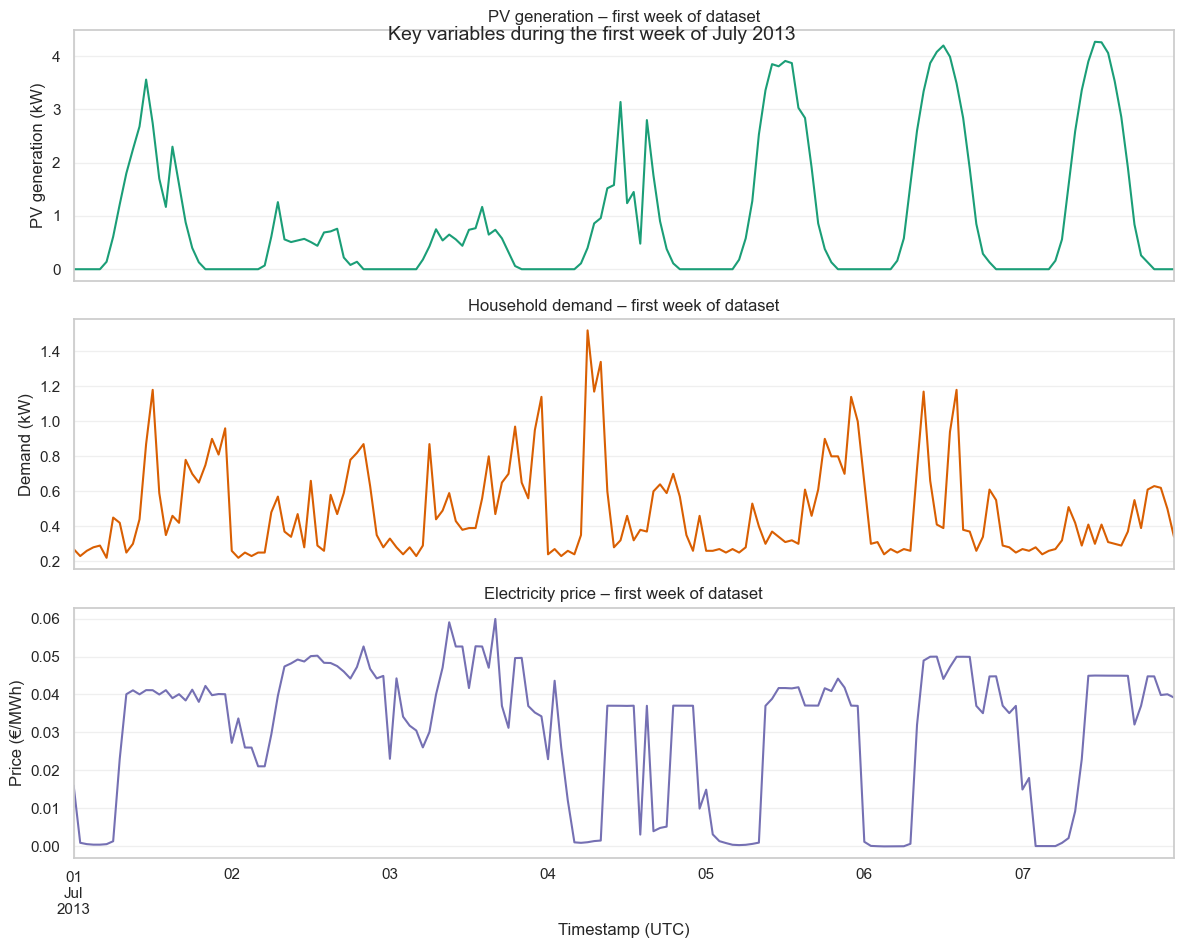

In [ ]:
# Visualize a representative week
# We select a summer week to clearly see the PV generation pattern
window = df.loc['2013-07-01':'2013-07-07']

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# PV Generation
window['pv'].plot(ax=axes[0], color='#1b9e77')
axes[0].set_ylabel('PV generation (kW)')
axes[0].set_title('PV generation – first week of dataset')
axes[0].grid(True, alpha=0.3)

# Demand
window['Demand'].plot(ax=axes[1], color='#d95f02')
axes[1].set_ylabel('Demand (kW)')
axes[1].set_title('Household demand – first week of dataset')
axes[1].grid(True, alpha=0.3)

# Price
window['Price'].plot(ax=axes[2], color='#7570b3')
axes[2].set_ylabel('Price (€/MWh)')
axes[2].set_title('Electricity price – first week of dataset')
axes[2].set_xlabel('Timestamp (UTC)')
axes[2].grid(True, alpha=0.3)

fig.suptitle('Key variables during the first week of July 2013', y=0.93, fontsize=14)
plt.tight_layout()

# Save the figure for the report
save_path = Path('..') / 'reports' / 'figures' / '01_timeseries.png'
# Ensure directory exists
save_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to {save_path}")

plt.show()

In [6]:
# Calculate daily summary
daily_summary = window.resample('D')[['pv', 'Demand', 'Price']].agg({'pv':'sum', 'Demand':'sum', 'Price':'mean'})
daily_summary.rename(columns={'pv': 'pv_sum_kWh', 'Demand': 'Demand_sum_kWh', 'Price': 'Price_mean'}, inplace=True)

print("Daily Summary (First Week):")
display(daily_summary)

Daily Summary (First Week):


,pv_sum_kWh,Demand_sum_kWh,Price_mean
timestamp,,,
2013-07-01 00:00:00+00:00,23.17,12.83,0.028639
2013-07-02 00:00:00+00:00,7.67,10.55,0.041178
2013-07-03 00:00:00+00:00,8.58,13.08,0.041636
2013-07-04 00:00:00+00:00,17.69,12.52,0.021180
2013-07-05 00:00:00+00:00,32.52,11.73,0.025830
2013-07-06 00:00:00+00:00,33.91,11.36,0.028954
2013-07-07 00:00:00+00:00,34.27,9.15,0.027545


## Digital transformation of household energy

Digitalisation reshapes how households source, store, and trade energy. Smart meters and IoT sensors stream granular demand, generation, and weather data to cloud platforms where learning algorithms optimise scheduling decisions. Utility marketplaces expose dynamic tariffs and flexibility markets, enabling prosumers to monetise surplus PV generation or shift consumption in response to price signals. For this project, digital tools (data acquisition, analytics pipelines, automated control) provide the foundation for constructing a personalised home energy management system that balances comfort, cost, and sustainability.

## Why solar generation analytics matter

- **Importance.** Solar output is volatile and weather-dependent. Quantifying its variability supports robust storage sizing, tariff selection, and demand response strategies that prevent curtailment or unplanned grid imports.
- **Private sector use-cases.** Homeowners can synchronise appliance schedules, charge batteries or EVs during high-PV hours, and estimate bill savings or payback periods for new assets.
- **Business sector use-cases.** Energy retailers, aggregators, and installers leverage PV forecasts to offer dynamic tariffs, virtual power plant services, or performance guarantees, all of which depend on accurate modelling of distributed solar fleets.

## Key takeaways

- PV generation in early July exhibits pronounced diurnal cycles with occasional cloud-induced dips.
- Demand shows morning and evening peaks, indicating potential for load shifting to align with PV output.
- Electricity prices fluctuate more slowly than PV and demand, suggesting opportunities to arbitrage when coupled with storage or flexible loads.
- A digitally enabled HEMS can operationalise these insights by forecasting demand/PV and optimising battery dispatch against price signals.